In [40]:
import numpy as np
from implementations import *
from general_helpers import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Load the data both from train and test csv file

In [7]:
y, x, ids = load_csv_data("train.csv", sub_sample=False)
_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)

y_small, x_small, ids_small = load_csv_data("train.csv", sub_sample=True)

# Test different ways of pre-processing data

In [8]:
x1 = np.copy(x) # make sure we don't modify the data
compare(x1) 

Here are the means of the columns containing -999 (not counting -999. for the mean calculation)

0.0
5.51397102408e-05
6.8924637801e-05
8.27095653612e-05
0.000165419130722
0.000153244451551
0.000159907253793
0.000166570056034
0.000358408116565
0.000372193044126
0.000385977971686

Note that these are all very close to zero.

Here are a few orders of magnitude of the differences between the cleaned X-matrices:

Set to 0 vs Replace by mean
First by simply replacing by the mean, then by normally distributed values around the mean.
These are actually so close to zero, and the values of the features so much bigger that
we might as well simply set outliers to 0


(array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          -2.42266536e-04,  -2.79556436e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00]]),
 array([[  1.11022302e-16,   4.16333634e-17,   1.11022302e-16, ...,
           2.42266536e-04,   2.79556436e-04,   2.22044605e-16],
        [  2.22044605e-16,   0.00000000e+00,   1.11022302e-1

In [9]:
#Set values to zero and standardize (both data and subset of data)
x[x==-999] = 0
x = standardize_by_column(x)

x_small[x_small==-999] = 0
x_small = standardize_by_column(x_small)

# Gradient Descent

In [20]:
degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree, False) #gets correct dimension of w to start
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001
#requires fine balance btw. iter/gamma - otherwise blows up


w = GD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)
#"simple splitting=>no cross validation

Correct answers:  67.256 % Execution time=0.6274950504302979 seconds


# Stochastic Gradient Descent

In [18]:
degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001
#requires fine balance btw. iter/gamma - otherwise blows up


w = SGD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)

Correct answers:  64.732 % Execution time=4.7787439823150635 seconds


# Least Squares

In [22]:
degree = 11
ratio = 0.70  #train/test examples
seed = 1

w = LS_with_simple_splitting(y,x, degree, ratio, seed)

Execution time=0.4962470531463623 seconds
Correct answers:  81.564


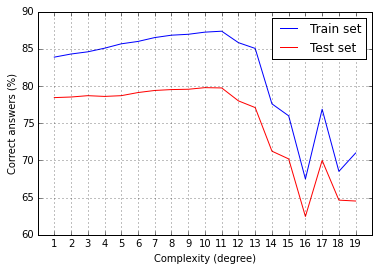

In [23]:
#Define values to perform Ridge regression with cross validation of the dataset for different degrees and plot it


k_fold = 5 #define the number of folds
degrees = list(range(1,20)) #define the degrees
lambda_ = 1e-4 #define the lambdas
seed = 145 #seed for the random splitting

loss_train,loss_test,corr_train, corr_test = cross_validation_ridge_degree(y_small, x_small,
                                                                           k_fold, degrees, lambda_, seed)

#Makes a plot of accuracy vs degree. Allows us to conclude that degree 11 is the best trade-off:
#a sufficiently rich model that does not overfit

plt.figure()
#plt.title("Correct answers (%) vs complexity for train and test set")
plt.xlabel("Complexity (degree)")
plt.ylabel("Correct answers (%)")
plt.plot(degrees, corr_train, 'b', label = "Train set")
plt.hold(True)
plt.plot(degrees, corr_test, 'r', label = "Test set")
plt.xticks(range(1,20))
plt.legend()
plt.grid(True)
plt.savefig("correct_complexity.png", format='png', dpi=1000)
plt.show()

# Ridge Regression

Correct answers:  82.636 % for lambda = 0.000000
Correct answers:  82.6346666667 % for lambda = 0.000000
Correct answers:  82.6346666667 % for lambda = 0.000000
Correct answers:  82.6333333333 % for lambda = 0.000000
Correct answers:  82.6413333333 % for lambda = 0.000001
Correct answers:  82.6426666667 % for lambda = 0.000001
Correct answers:  82.6453333333 % for lambda = 0.000002
Correct answers:  82.6426666667 % for lambda = 0.000003
Correct answers:  82.6373333333 % for lambda = 0.000005
Correct answers:  82.6306666667 % for lambda = 0.000008
Correct answers:  82.6373333333 % for lambda = 0.000013
Correct answers:  82.6346666667 % for lambda = 0.000021
Correct answers:  82.6306666667 % for lambda = 0.000034
Correct answers:  82.6146666667 % for lambda = 0.000055
Correct answers:  82.6013333333 % for lambda = 0.000089
Correct answers:  82.588 % for lambda = 0.000144
Correct answers:  82.564 % for lambda = 0.000234
Correct answers:  82.5573333333 % for lambda = 0.000379
Correct answe

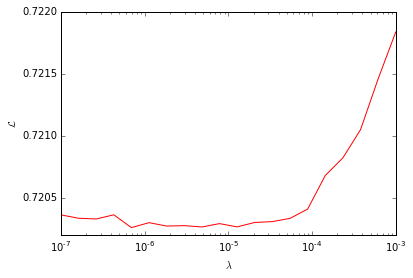

In [24]:
degree = 11
ratio = 0.70  #train/test examples
#lambdas = np.logspace(-8,0.1,20) 
lambdas = np.logspace(-7,-3,20)

seed = 1

w = ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)

# Generalizing... Bayes Regression

Correct answers:  82.632 % for lambda = 0.000000
Correct answers:  82.632 % for lambda = 0.000000
Correct answers:  82.6413333333 % for lambda = 0.000000
Correct answers:  82.632 % for lambda = 0.000000
Correct answers:  82.6333333333 % for lambda = 0.000001
Correct answers:  82.6386666667 % for lambda = 0.000001
Correct answers:  82.6453333333 % for lambda = 0.000002
Correct answers:  82.648 % for lambda = 0.000003
Correct answers:  82.636 % for lambda = 0.000005
Correct answers:  82.6266666667 % for lambda = 0.000008
Correct answers:  82.628 % for lambda = 0.000013
Correct answers:  82.6213333333 % for lambda = 0.000021
Correct answers:  82.6226666667 % for lambda = 0.000034
Correct answers:  82.6293333333 % for lambda = 0.000055
Correct answers:  82.6346666667 % for lambda = 0.000089
Correct answers:  82.6146666667 % for lambda = 0.000144
Correct answers:  82.6146666667 % for lambda = 0.000234
Correct answers:  82.584 % for lambda = 0.000379
Correct answers:  82.5653333333 % for lam

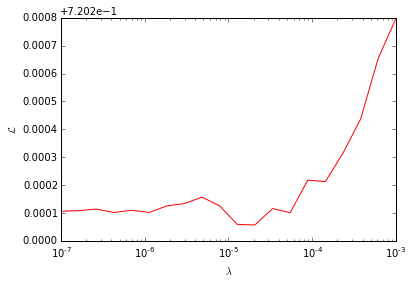

In [49]:
# Interesting but does not really improve much over Ridge Regression

degree = 11
ratio = 0.70  #train/test examples
#lambdas = np.logspace(-8,0.1,20) 
lambdas = np.logspace(-7,-3,20)

q = 3 #Power of the norm of w

seed = 1

w = bayes_with_simple_splitting(y,x, degree, ratio, lambdas, q, seed)

# Ridge Regression With Cross Validation

In [25]:
degree = 11
lambdas = np.logspace(-7,-2,10)
k_fold = 4
seed = 1

cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)


 k= 1 

Correct answers:  82.6416 % for lambda = 0.000000
Correct answers:  82.6512 % for lambda = 0.000000
Correct answers:  82.64 % for lambda = 0.000001
Correct answers:  82.6448 % for lambda = 0.000005
Correct answers:  82.6352 % for lambda = 0.000017
Correct answers:  82.632 % for lambda = 0.000060
Correct answers:  82.6752 % for lambda = 0.000215
Correct answers:  82.6672 % for lambda = 0.000774
Correct answers:  82.576 % for lambda = 0.002783
Correct answers:  82.3104 % for lambda = 0.010000

 k= 2 

Correct answers:  82.9552 % for lambda = 0.000000
Correct answers:  82.9568 % for lambda = 0.000000
Correct answers:  82.9536 % for lambda = 0.000001
Correct answers:  82.9568 % for lambda = 0.000005
Correct answers:  82.9776 % for lambda = 0.000017
Correct answers:  82.9696 % for lambda = 0.000060
Correct answers:  82.9552 % for lambda = 0.000215
Correct answers:  82.8864 % for lambda = 0.000774
Correct answers:  82.7712 % for lambda = 0.002783
Correct answers:  82.5056 % for lamb

array([  3.87830192e-01,  -1.64802571e-01,  -2.52456415e-01,
         1.01059462e-01,   2.79162136e-02,  -2.32915822e-02,
         5.72580886e-03,  -7.22932803e-04,   5.06786793e-05,
        -1.87447064e-06,   2.85528447e-08,  -2.28563842e-01,
        -2.38223738e-03,   5.41237177e-02,   1.32449185e-03,
        -6.82490855e-03,   1.70118656e-03,  -1.86699963e-04,
         9.86339967e-06,  -1.74546267e-07,  -4.27293277e-09,
         1.56715918e-10,   5.01427506e-02,  -2.14264547e-01,
        -1.15166131e-01,   1.40998268e-01,  -4.60123768e-02,
         7.46535029e-03,  -6.93776122e-04,   3.85688583e-05,
        -1.26662874e-06,   2.26402027e-08,  -1.69621542e-10,
         1.13057102e-01,   3.35630158e-02,  -2.17122172e-02,
         1.42206361e-02,  -3.13963615e-03,   2.12765640e-04,
         5.02017505e-06,  -4.75633848e-07,  -2.60785045e-08,
        -2.63295892e-10,   5.30442213e-11,  -2.38133950e-02,
        -4.81191802e-02,   3.32563292e-04,   3.97429972e-03,
         1.43891243e-02,

# Logistic Regression

In [26]:
degree = 1
ratio = 0.70 
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 1000 , 1.
logistic_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed = 1)

/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:107: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  71.0693333333 %


array([  1.43527652e+07,  -3.56460556e+07,  -5.11968645e+06,
         8.98847355e+06,   5.06757853e+06,   6.39531343e+06,
        -5.85289818e+06,   1.18735787e+07,  -3.68936091e+06,
         1.57923621e+06,  -1.60300554e+07,   2.08289717e+07,
         6.77927388e+06,   1.23143374e+07,  -3.21771752e+04,
        -3.52869796e+05,  -2.52704054e+06,   1.21783254e+05,
         1.30378046e+05,  -6.04136881e+06,   3.04894572e+05,
         6.46186267e+05,   3.51772592e+05,   4.57704918e+06,
        -5.08931856e+04,   1.90699845e+04,  -2.83991326e+06,
        -1.86246419e+03,  -1.80258885e+04,  -3.82625926e+05,
        -8.02454102e+07])

In [28]:
#Regularized Logistic Regression
degree = 1
ratio = 0.7
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 1000 , 1.
lambdas = np.logspace(-7,-3,5)
reg_logistic_with_simple_splitting(y,x, 1, ratio, initial_w, max_iters, gamma, lambdas, seed = 1)

/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  71.0693333333 % for lambda = 0.000000
Correct answers:  71.0693333333 % for lambda = 0.000001
Correct answers:  71.0693333333 % for lambda = 0.000010
Correct answers:  71.0693333333 % for lambda = 0.000100
Correct answers:  71.0706666667 % for lambda = 0.001000


array([  9.07259368e+06,  -2.25298398e+07,  -3.23788714e+06,
         5.68211802e+06,   3.20322109e+06,   4.04138803e+06,
        -3.69902503e+06,   7.50603620e+06,  -2.33132034e+06,
         9.98125250e+05,  -1.01317060e+07,   1.31638899e+07,
         4.28456160e+06,   7.78279918e+06,  -1.99697553e+04,
        -2.23283201e+05,  -1.59649054e+06,   7.70150898e+04,
         8.21257181e+04,  -3.81906454e+06,   1.92776892e+05,
         4.08287795e+05,   2.22895392e+05,   2.89323757e+06,
        -3.23523353e+04,   1.16290001e+04,  -1.79495387e+06,
        -1.22519489e+03,  -1.15536747e+04,  -2.41929378e+05,
        -5.07181467e+07])

In [35]:
#(Reg.) Logistic Regression With Cross Validation

k_fold = 2 #define the number of folds
degree = 1 #define the degree
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 1000 , 1.
lambdas = np.logspace(-7,-3,5) #define the lambdas
seed = 1 #seed for the random splitting

cross_validation_logistic(y, x, initial_w, max_iters, gamma, k_fold, degree, lambdas, seed)


 k= 1 



/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  71.2736 % for lambda = 0.000000
Correct answers:  71.2736 % for lambda = 0.000001
Correct answers:  71.2736 % for lambda = 0.000010
Correct answers:  71.2728 % for lambda = 0.000100
Correct answers:  71.2728 % for lambda = 0.001000

 k= 2 

Correct answers:  71.1152 % for lambda = 0.000000
Correct answers:  71.1152 % for lambda = 0.000001
Correct answers:  71.1152 % for lambda = 0.000010
Correct answers:  71.1152 % for lambda = 0.000100
Correct answers:  71.1152 % for lambda = 0.001000


array([  6.43975648e+06,  -1.60540544e+07,  -2.27587168e+06,
         4.03389136e+06,   2.34845882e+06,   2.88231961e+06,
        -2.70454199e+06,   5.49340839e+06,  -1.62343266e+06,
         7.50982700e+05,  -7.25484877e+06,   9.39408550e+06,
         3.09013342e+06,   5.54605063e+06,  -8.01580056e+04,
        -1.85511995e+05,  -1.13933069e+06,   8.02339419e+04,
         3.21884416e+04,  -2.71767931e+06,   1.11040481e+05,
         3.58252032e+05,   2.59467801e+05,   2.06561242e+06,
         5.55168998e+03,   4.16029492e+04,  -1.22120725e+06,
         5.54419542e+04,  -7.73466584e+04,  -1.25142004e+05,
        -3.62394560e+07])

# Histogram comparing all methods

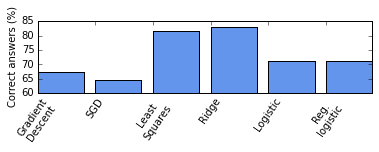

In [36]:
correct_perc = [67.256, 64.732, 81.564, 82.9776, 71.0693333333, 71.0706666667]
methods = range(len(correct_perc))
plt.figure(figsize=(6,2))
plt.xticks(methods, ["Gradient\nDescent", "SGD","Least\nSquares", "Ridge","Logistic", "Reg.\nlogistic"],rotation=55, fontsize=10)
plt.bar(methods, correct_perc, color = 'cornflowerblue')
plt.ylim(60,85)
plt.ylabel("Correct answers (%)")
plt.gcf().subplots_adjust(bottom=.4)
plt.savefig("methods_bars.eps", format = "eps", dpi=1000)